##==================================================================##
##        File: Electrochemical-plots.ipynb
##      Author: GOTTFRID OLSSON 
##     Created: 2024-04-24
##     Updated: 2024-04-24
##       About: Reads .txt files of electrochemical cycling of cells
##              and plots the data for the Master's Thesis [TIFX05].
##==================================================================##

In [2]:
# LIBRARIES #

import numpy as np
import CSV_handler as CSV
import plot_functions as f
import matplotlib.pyplot as plt


In [3]:
# PLOT SETTINGS #

fig_width_cm  = 16
fig_height_cm = 9

font_size_axis   = 13
font_size_tick   = 11
font_size_legend = 9

grid_major = True
grid_minor = False
legend_on = True

f.set_LaTeX_and_CMU(True) #must run before plotting

DONE: set_LaTeX_and_CMU: True


In [34]:
def shift_df_column_to_start_at_zero(df_column):
    df_column_shift_value = df_column[0]
    return df_column - df_column_shift_value

In [35]:
# Paths for data

# SEIDEP: Deposition of Li after a 0.010 V hold and reaching a certain value of i_SEI / i_deposition (= \sigma)
SEIDEP_root_path = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Battery-cycling\\SEIDEP\\'

# sigma_x, _0x, _00x means: sigma = x, 0.x, or 0.0x
SEIDEP_sigma_1_path_MB   = SEIDEP_root_path + '2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt' # SEI-formation
SEIDEP_sigma_1_path_CP   = SEIDEP_root_path + '2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt' # Li-deposition
SEIDEP_sigma_01_path_MB  = SEIDEP_root_path + '2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt'
SEIDEP_sigma_01_path_CP  = SEIDEP_root_path + '2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt'
SEIDEP_sigma_005_path_MB = SEIDEP_root_path + '2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C05.txt'
SEIDEP_sigma_005_path_CP = SEIDEP_root_path + '2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C05.txt'

SEIDEP_sigma_1_MB_df   = CSV.read(SEIDEP_sigma_1_path_MB, delimiter='\t') # time/s, potential/V, current/mA  (potential = potential of working electrode vs. reference elctrode)
SEIDEP_sigma_1_CP_df   = CSV.read(SEIDEP_sigma_1_path_CP, delimiter='\t') # time/s, potential/V, current/mA  (potential = potential of working electrode vs. reference elctrode)
SEIDEP_sigma_01_MB_df  = CSV.read(SEIDEP_sigma_01_path_MB, delimiter='\t')
SEIDEP_sigma_01_CP_df  = CSV.read(SEIDEP_sigma_01_path_CP, delimiter='\t')
SEIDEP_sigma_005_MB_df = CSV.read(SEIDEP_sigma_005_path_MB, delimiter='\t')
SEIDEP_sigma_005_CP_df = CSV.read(SEIDEP_sigma_005_path_CP, delimiter='\t')

SEIDEP_sigma_1_MB_df   = SEIDEP_sigma_1_MB_df[SEIDEP_sigma_1_MB_df.columns[:-1]] #drop last 'unnamed column' (Biologic software apparantly produces one extra column)
SEIDEP_sigma_1_CP_df   = SEIDEP_sigma_1_CP_df[SEIDEP_sigma_1_CP_df.columns[:-1]] 
SEIDEP_sigma_01_MB_df  = SEIDEP_sigma_01_MB_df[SEIDEP_sigma_01_MB_df.columns[:-1]]
SEIDEP_sigma_01_CP_df  = SEIDEP_sigma_01_CP_df[SEIDEP_sigma_01_CP_df.columns[:-1]]
SEIDEP_sigma_005_MB_df = SEIDEP_sigma_005_MB_df[SEIDEP_sigma_005_MB_df.columns[:-1]]
SEIDEP_sigma_005_CP_df = SEIDEP_sigma_005_CP_df[SEIDEP_sigma_005_CP_df.columns[:-1]]

# time/s, potential/V, current/mA
t_data_sigma_1_MB   = SEIDEP_sigma_1_MB_df.loc[:,"time/s"] - 60 #remove 1 min OCV time
t_data_sigma_01_MB  = SEIDEP_sigma_01_MB_df.loc[:,"time/s"] - 60
t_data_sigma_005_MB = SEIDEP_sigma_005_MB_df.loc[:,"time/s"] - 60 

V_data_sigma_1_MB   = SEIDEP_sigma_1_MB_df.loc[:,"Ewe/V"]
V_data_sigma_01_MB  = SEIDEP_sigma_01_MB_df.loc[:,"Ewe/V"]
V_data_sigma_005_MB = SEIDEP_sigma_005_MB_df.loc[:,"Ewe/V"]

I_data_sigma_1_MB   = SEIDEP_sigma_1_MB_df.loc[:,"I/mA"]
I_data_sigma_01_MB  = SEIDEP_sigma_01_MB_df.loc[:,"I/mA"]
I_data_sigma_005_MB = SEIDEP_sigma_005_MB_df.loc[:,"I/mA"]


t_data_sigma_1_CP   = SEIDEP_sigma_1_CP_df.loc[:,"time/s"]
t_data_sigma_1_CP = shift_df_column_to_start_at_zero(t_data_sigma_1_CP) # want Li-deposition to start at same time for the different sigma values
t_data_sigma_01_CP  = SEIDEP_sigma_01_CP_df.loc[:,"time/s"]
t_data_sigma_01_CP = shift_df_column_to_start_at_zero(t_data_sigma_01_CP)
t_data_sigma_005_CP = SEIDEP_sigma_005_CP_df.loc[:,"time/s"]  
t_data_sigma_005_CP = shift_df_column_to_start_at_zero(t_data_sigma_005_CP)

V_data_sigma_1_CP   = SEIDEP_sigma_1_CP_df.loc[:,"Ewe/V"]
V_data_sigma_01_CP  = SEIDEP_sigma_01_CP_df.loc[:,"Ewe/V"]
V_data_sigma_005_CP = SEIDEP_sigma_005_CP_df.loc[:,"Ewe/V"]

I_data_sigma_1_CP   = SEIDEP_sigma_1_CP_df.loc[:,"I/mA"]
I_data_sigma_01_CP  = SEIDEP_sigma_01_CP_df.loc[:,"I/mA"]
I_data_sigma_005_CP = SEIDEP_sigma_005_CP_df.loc[:,"I/mA"]


DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C05.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLi

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.0001, 8000) and y=(-0.21, 0.0001) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_title to: T-cells, SEI-formation, E_we=0.010 V, different $\sigma$
DONE: align_labels
DONE: set_layout_tight


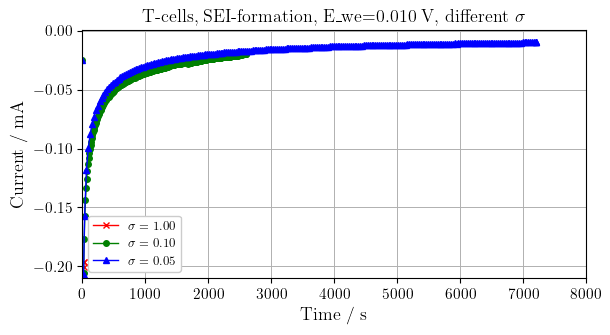

In [55]:
# PLOT SEIDEP: I vs. t (T-cells) #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...)
axs.plot(t_data_sigma_1_MB,   I_data_sigma_1_MB,   linewidth=1, linestyle='-', color='r', marker='x', markersize='4', label='$\\sigma=1.00$')
axs.plot(t_data_sigma_01_MB,  I_data_sigma_01_MB,  linewidth=1, linestyle='-', color='g', marker='o', markersize='4', label='$\\sigma=0.10$')
axs.plot(t_data_sigma_005_MB, I_data_sigma_005_MB, linewidth=1, linestyle='-', color='b', marker='^', markersize='4', label='$\\sigma=0.05$')
#axs.plot(fit_x, fit_y, color='k', linestyle='-', label='Linear fit')

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / s', y_label='Current / mA')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-0.0001, xmax=8000, ymin=-0.21, ymax=0.0001)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.set_title('T-cells, SEI-formation, E_we=0.010 V, different $\\sigma$')
f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.1, 5.1) and y=(-0.21, 0.01) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_title to: T-cells, Li-deposition, J=1mA/cm2, different $\sigma$
DONE: align_labels
DONE: set_layout_tight


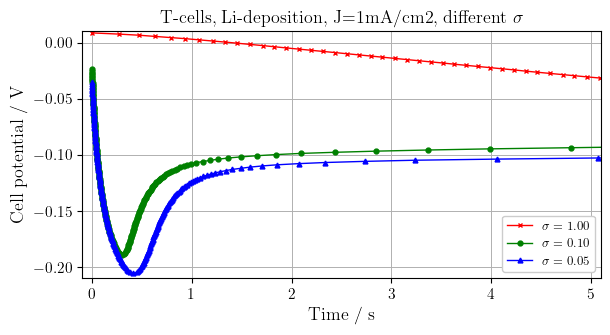

In [56]:
# PLOT SEIDEP: V vs. t (T-cells) #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...)
axs.plot(t_data_sigma_1_CP,   V_data_sigma_1_CP,   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.5', label='$\\sigma=1.00$')
axs.plot(t_data_sigma_01_CP,  V_data_sigma_01_CP,  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.5', label='$\\sigma=0.10$')
axs.plot(t_data_sigma_005_CP, V_data_sigma_005_CP, linewidth=1, linestyle='-', color='b', marker='^', markersize='3.5', label='$\\sigma=0.05$')
#axs.plot(fit_x, fit_y, color='k', linestyle='-', label='Linear fit')

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / s', y_label='Cell potential / V')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-0.1, xmax=5.1, ymin=-0.21, ymax=0.01)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.set_title('T-cells, Li-deposition, J=1mA/cm2, different $\\sigma$')
f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()